# Workdir

In [2]:
workdir = '/home/97n/simulations/ARCS/Si/singlextal-diffraction/'

In [3]:
!mkdir -p {workdir}
%cd {workdir}

/home/97n/simulations/ARCS/Si/singlextal-diffraction


# Tools

In [4]:
import tqdm

In [6]:
from matplotlib import pyplot as plt
import numpy as np, os
import histogram.hdf as hh, histogram as H

/home/97n/miniconda3/envs/mcvine-py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [63]:
%matplotlib notebook
# %matplotlib inline

# Sample spec

In [60]:
cd {workdir}

/home/97n/simulations/ARCS/Si/singlextal-diffraction


In [67]:
%%file Si.yml
name: Si
chemical_formula: Si #
lattice: 
 constants: 5.431, 5.431, 5.431, 90, 90, 90
 basis_vectors:
  - 5.431, 0, 0
  - 0, 5.431, 0
  - 0, 0, 5.431
excitation:
 type: singlecrystal_diffraction
 Dd_over_d: 1.e-4
 mosaic: 5./60*deg
 lau_path: Si.lau
orientation:
 u: -1, 1, -1
 v: 2, 1, -1
shape: hollowCylinder in_radius="5./8*inch" out_radius="1.*inch" height="1.5*inch"
temperature: 300*K

Overwriting Si.yml


In [68]:
!cp /home/97n/dv/mcvine/mcvine/packages/mccomponents/tests/mccomponents/sample/diffraction/Si.cif .
!cp /home/97n/dv/mcvine/mcvine/packages/mccomponents/tests/mccomponents/sample/diffraction/Si.lau .

# Workflow

In [18]:
cd {workdir}

/home/97n/simulations/ARCS/Si/singlextal-diffraction


In [19]:
rm -rf sim/

In [20]:
!mcvine workflow singlecrystal --instrument=arcs --sample=Si.yml --outdir=sim --type=DGS

/home/97n/miniconda3/envs/mcvine-py36/lib/python3.6/site-packages/mcvine/workflow/sampleassembly/scaffolding/sampleassembly_xml.py:22: UserWarning: assume average temperature
  warnings.warn("assume average temperature")


# Fine tune sample

In [21]:
ls sim/sampleassembly/

sampleassembly.xml  Si-scatterer.xml  Si.xyz


In [22]:
!cp Si.cif sim/sampleassembly/
!cp Si.lau sim/sampleassembly/

In [23]:
%%file sim/sampleassembly/sampleassembly.xml
<?xml version="1.0"?>

<!DOCTYPE SampleAssembly>

<SampleAssembly name="X"
   max_multiplescattering_loops_among_scatterers="1"
   max_multiplescattering_loops_interactM_path1="4"
   min_neutron_probability=".1"
 >

  <PowderSample name="Si" type="sample">
    <Shape>
      <hollowCylinder in_radius="5./8*inch" out_radius="1.*inch" height="1.5*inch" />
    </Shape>
    <Phase type="crystal">
      <ChemicalFormula>Si</ChemicalFormula>
      <ciffile>Si.cif</ciffile>
    </Phase>
  </PowderSample>

  <LocalGeometer registry-coordinate-system="InstrumentScientist">
    <Register name="Si" position="(0,0,0)" orientation="(0, 0, 0)"/>
  </LocalGeometer>

  <Environment temperature="300*K"/>

</SampleAssembly>

Overwriting sim/sampleassembly/sampleassembly.xml


In [24]:
%%file sim/sampleassembly/Si-scatterer.xml
<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  packing_factor="1.0"
  >
  
  <KernelContainer average="no">

    <Phonon_IncoherentElastic_Kernel dw_core='0.*angstrom**2'>
    </Phonon_IncoherentElastic_Kernel>
    
    <SingleCrystalDiffractionKernel
        weight="1."        
        orientation="0.8164965809277259,0.40824829046386296,-0.40824829046386296,0.0,-0.7071067811865475,-0.7071067811865475,-0.5773502691896257,0.5773502691896257,-0.5773502691896257"
        Dd_over_d="0.0001"
        lau-path="Si.lau"
        mosaic="5./60*deg"
    >
    </SingleCrystalDiffractionKernel>
    
  </KernelContainer>
  
</homogeneous_scatterer>

Overwriting sim/sampleassembly/Si-scatterer.xml


# Beam sim

In [25]:
cd {workdir}/sim/beam

/home/97n/simulations/ARCS/Si/singlextal-diffraction/sim/beam


In [26]:
!mcvine instruments arcs beam --help-properties

properties of 'arcs_beam':
    E=<float>: desired incident beam energy. unit: meV
        default value: 70
        current value: 70.0, from {{{default}}}
    T0_nu=<float>: Spinning frequency of T0 chopper
        default value: 60
        current value: 60.0, from {{{default}}}
    buffer_size=<int>: (no documentation available)
        default value: 0
        current value: 0, from {{{default}}}
    dumpconfiguration=<bool>: If set, dump configuration to a pml file
        default value: 0
        current value: False, from {{{default}}}
    dumpconfiguration-output=<str>: Output file path of dumped configuration file (pml)
        default value: ''
        current value: '', from {{{default}}}
    emission_time=<float>: emission time for moderator unit (microsecond)
        default value: -1
        current value: -1.0, from {{{default}}}
    fermi_chopper=<str>: The choice of fermi chopper
        default value: '100-1.5-SMI'
        current value: '100-1.5-SMI', from {{{default

In [27]:
!rm -rf *

In [28]:
%%file run-beam.sh
#!/usr/bin/env bash
#
mcvine instruments arcs beam --keep-in-cache --use-cache \
    --ncount=1e9 --nodes=40 --E=100.

Writing run-beam.sh


In [29]:
!chmod +x run-beam.sh

5min

In [30]:
%%time
! ./run-beam.sh >log.run 2>&1

CPU times: user 297 µs, sys: 15.1 ms, total: 15.4 ms
Wall time: 374 ms


## Check

In [31]:
ls out

ienergy.h5  ix_divy.h5  iy_divy.h5            neutrons
itof.h5     ix_y.h5     mon1-itof-focused.h5  props.json
ix_divx.h5  iy_divx.h5  mon2-itof-focused.h5  rank0-step0/


In [32]:
H.plot(hh.load('out/ienergy.h5'))

# Scattering

In [33]:
cd {workdir}/sim/scattering

/home/97n/simulations/ARCS/Si/singlextal-diffraction/sim/scattering


In [34]:
ls

scripts/  sim.yml  template/


## Customize sim

In [77]:
%%file sim.yml
cluster:
  nodes: 40
instrument:
  name: arcs
scatter:
  ncount: 1e7
  buffer_size: 0
  multiple_scattering: off
  template: ./template

Overwriting sim.yml


## Try one angle

In [79]:
rm -rf work_31.0/

In [80]:
%%time
! ./scripts/sim.py --angle=31.0

ln -s ../../beam
ln -s ../../sampleassembly
NCOUNT=1e7 BUFFER_SIZE=0 NODES=40 SAMPLE_ANGLE=31.0 ./scatter </dev/null >log.scatter 2>&1
INSTRUMENT=arcs NODES=40 SAMPLE_ANGLE=31.0 time ./create-nxs >log.create-nxs 2>&1
CPU times: user 481 ms, sys: 182 ms, total: 663 ms
Wall time: 1min 25s


In [81]:
ls work_31.0/*.nxs

work_31.0/sim_31.0_no_metadata.nxs  work_31.0/sim_31.0-with-monitors.nxs
work_31.0/sim_31.0.nxs


## Run all angles

In [39]:
psi_angles = np.arange(.5, 94.6, 1.)

In [40]:
%%file create-run.py
import numpy as np
ostream = open('run.sh', 'wt')
for a in  np.arange(.5, 94.6, 1.):
    ostream.write('./scripts/sim.py --angle=%s \n' % a)
    continue
ostream.close()

Writing create-run.py


In [41]:
!python create-run.py

In [42]:
!chmod +x run.sh

In [82]:
rm -rf work_*

In [83]:
%%time
!./run.sh >log.run

CPU times: user 47.3 s, sys: 6.65 s, total: 53.9 s
Wall time: 2h 13min 57s


# Reduction

In [44]:
from mantid import simpleapi as msa

In [84]:
%cd "{workdir}/sim/scattering"

/home/97n/simulations/ARCS/Si/singlextal-diffraction/sim/scattering


In [85]:
nxsfiles = ['work_{}/sim_{}-with-monitors.nxs'.format(a, a) for a in psi_angles]

In [86]:
nxsfiles_withpsi = []
for a, f in tqdm.tqdm(zip(psi_angles, nxsfiles)):
    ws = msa.Load(f)
    msa.AddSampleLog(ws, LogName='psi', LogText=str(a), LogType='Number')
    # assert('psi' in ws.getRun().keys())
    bn, ext = os.path.splitext(f)
    fo = os.path.abspath('sim_{}-with_psi.nxs'.format(a))
    msa.SaveNexus(ws, FileName=fo)
    assert os.path.exists(fo)
    nxsfiles_withpsi.append(fo)
    continue

95it [03:56,  2.49s/it]


In [87]:
ls -tl {nxsfiles_withpsi[0]}

-rw-rw-r-- 1 97n 97n 31364620 Dec  4 13:03 /home/97n/simulations/ARCS/Si/singlextal-diffraction/sim/scattering/sim_0.5-with_psi.nxs


In [88]:
wg = msa.Load(Filename=','.join(nxsfiles_withpsi))

In [89]:
%%time
msa.SetGoniometer(Workspace=wg, Axis0="psi,0,1,0,1")

msa.DgsReduction(
    SampleInputWorkspace=wg, IncidentEnergyGuess=100.,
    SofPhiEIsDistribution=False, OutputWorkspace='reduced')
None

CPU times: user 13min 50s, sys: 14.2 s, total: 14min 4s
Wall time: 2min 50s


In [90]:
msa.CropWorkspaceForMDNorm("reduced", XMin=-50, XMax=90., OutputWorkspace='reduced')

msa.ConvertToMD(
    'reduced', 
    QDimensions='Q3D', 
    Q3DFrames='Q_sample',
    OutputWorkspace='md',
    MinValues='-15,-15,-15,-50',
    MaxValues='15,15,15,90.'
)
None

In [91]:
%%time
msa.MergeMD(InputWorkspaces='md', OutputWorkspace='merged')
None

CPU times: user 1min 48s, sys: 3min 10s, total: 4min 59s
Wall time: 14.9 s


In [92]:
merged_md_path = '/home/97n/data/ARCS/silicon/10565/sim_merged_md.nxs'
msa.SaveMD('merged', merged_md_path)

## Load

In [45]:
msa.LoadMD(merged_md_path, OutputWorkspace='merged')
None

## Slice

In [93]:
a,b,c,alpha,beta,gamma = 5.431, 5.431, 5.431, 90., 90., 90.

In [94]:
u = [-1., 1., -1.]
v = [2., 1., -1.]

In [95]:
msa.SetUB('merged', a=a, b=b, c=c, u=','.join(map(str, u)), v = ','.join(map(str,v)))

In [96]:
msa.MDNorm(
    'merged',
    QDimension0='1,0,0',
    QDimension1='0,1,0',
    QDimension2='0,0,1',
    Dimension0Name='QDimension0',
    Dimension0Binning='-10.0,0.1,3.4',
    Dimension1Name='QDimension1',
    Dimension1Binning='-9.0,0.1,7.0',
    Dimension2Name='QDimension2',
    Dimension2Binning='-10,10',
    Dimension3Name="DeltaE",
    Dimension3Binning='-5,20',
    OutputWorkspace='result',
    OutputDataWorkspace='dataMD',
    OutputNormalizationWorkspace='normMD'
)
None

In [97]:
from mantid import plots
from matplotlib.colors import LogNorm

In [98]:
msa.SaveMD(msa.mtd['result'], os.path.abspath('Ihk.nxs'))

In [99]:
Ihk = msa.LoadMD(os.path.abspath('Ihk.nxs'))

<IPython.core.display.Javascript object>


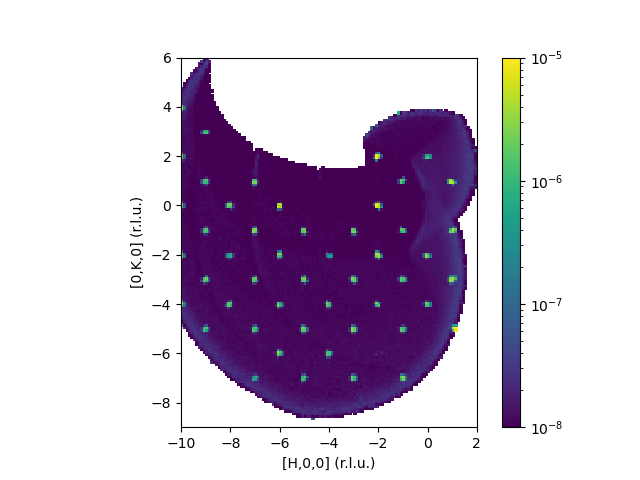

In [100]:
fig, ax = plt.subplots(subplot_kw={'projection':'mantid'})
cm = ax.pcolormesh(Ihk, norm=LogNorm())
fig.colorbar(cm, ax=ax)
ax.set_aspect('equal')
ax.set_xlim(-10., 2)
ax.set_ylim(-9, 6)
cm.set_clim(1e-8, 1e-5)